In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jf_wep.donutStamp import DonutStamp
from jf_wep.imageMapper import ImageMapper

In [2]:
mapper = ImageMapper(addIntrinsic=True)

In [3]:
# Set the Zernikes (in meters)
zk = np.zeros(19)
zk[0] = -1.1e-6
zk[1] = -0.5e-6
zk[2] = 0.4e-6
zk[3] = -1e-6
zk[4] = -0.2e-6


In [4]:
def roundtrip(fieldAngle, defocalType, zk, nPixels=180):
    # Forward model an image
    image = DonutStamp(
        np.zeros((nPixels, nPixels)),
        fieldAngle,
        defocalType,
    )
    image = mapper.mapPupilToImage(image, zk)

    # Then map back to the pupil
    pupilRecon = mapper.mapImageToPupil(image, zk)

    # Load the pupil mask
    uPupil, vPupil = mapper.instrument.createPupilGrid()
    pupil = mapper.createPupilMask(image)

    # Plot everything!
    fig, axes = plt.subplots(1, 4, figsize=(10, 2), dpi=150)

    settings = {"origin": "lower", "vmin": 0, "vmax": 1}

    axes[0].imshow(pupil, **settings)
    axes[0].set(title="Original")

    axes[1].imshow(image.image, **settings)
    axes[1].set(title="Mapped to image")

    axes[2].imshow(pupilRecon.image, **settings)
    axes[2].set(title="Back to pupil")

    axes[3].imshow(np.abs(pupilRecon.image - pupil), **settings)
    axes[3].set(title="Abs Pupil difference")


Center of field

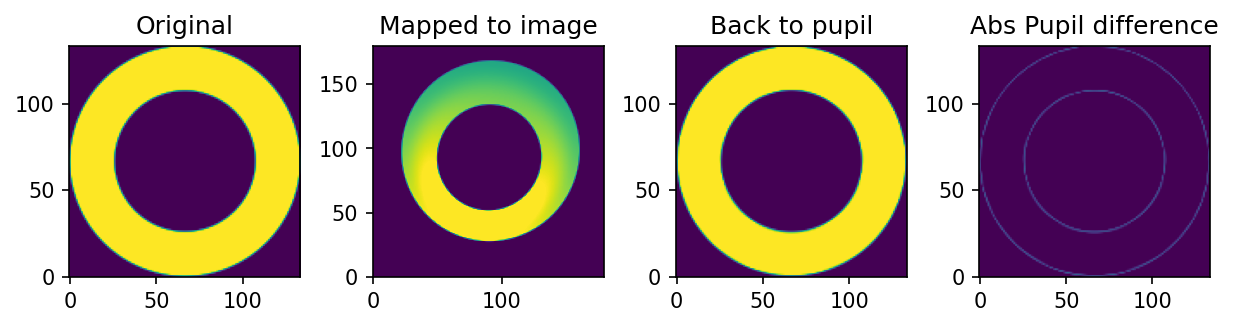

In [5]:
roundtrip((0, 0), "intra", zk)

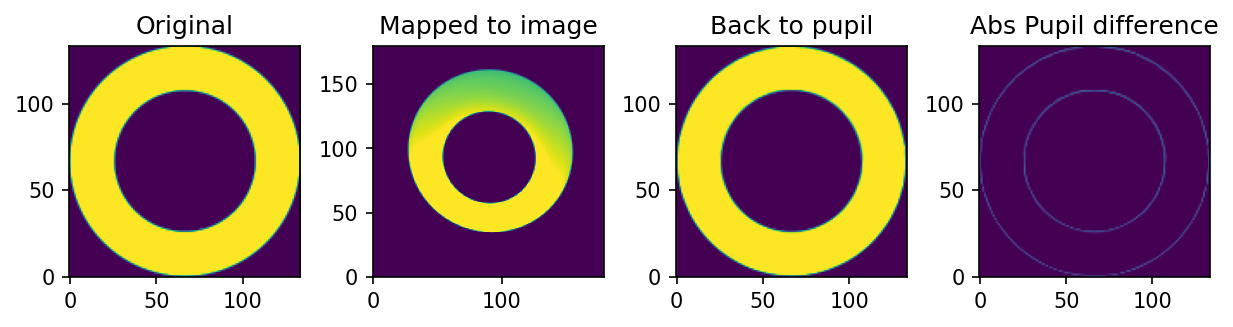

In [6]:
roundtrip((0, 0), "extra", zk)

Corner of field

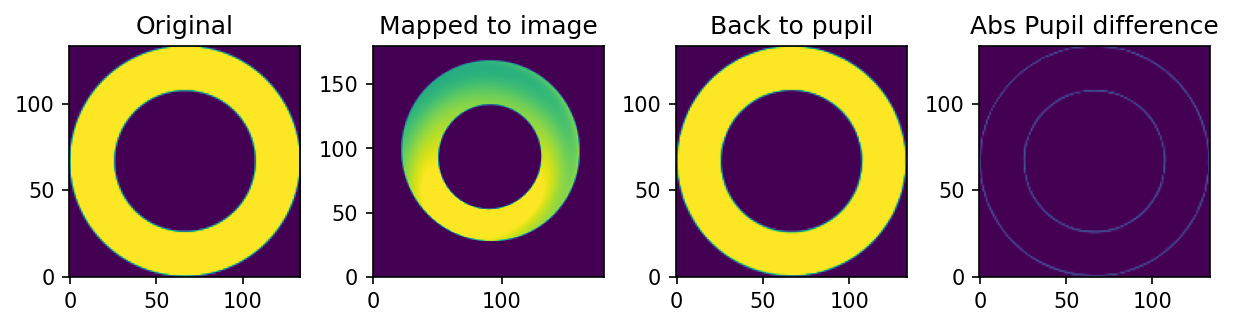

In [7]:
roundtrip((1, 1), "intra", zk)

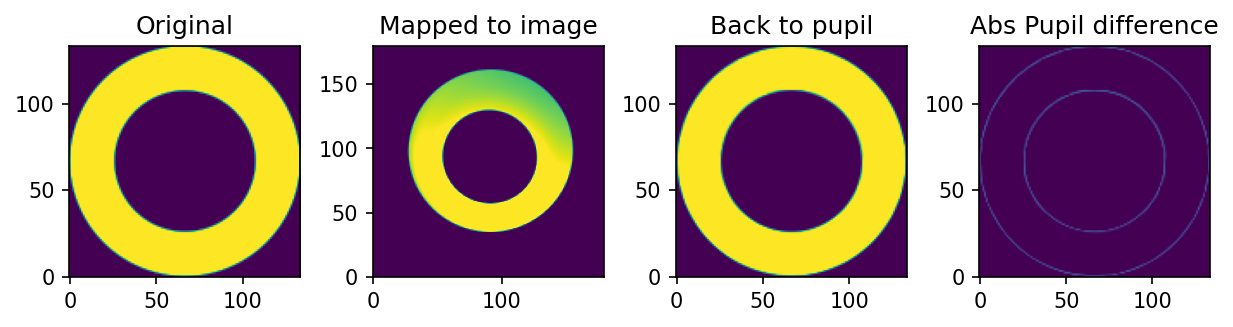

In [8]:
roundtrip((1, 1), "extra", zk)